Name: Nguyễn Lâm Vĩnh Gia - ID: 2052074

# SCIKIT LEARN CLASSIFICATION ASSIGNMENT

## 1. Load the dataset

In this exercise, we will use the Iris dataset of 2 classes of flower Setosa and Versicolor from the Scikit Learn library, including 100 samples of these 2 types of flower, each of which has 4 features.

In [1]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

iris = load_iris()
iris_data = iris.data
iris_target = iris.target

# Convert data to Pandas frame
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
# Extract data of 2 classes Setosa and Versicolor
options = [0.0,1.0]
df = df[df['target'].isin(options)]
print("Shape of the dataframe " + str(df.shape))
print(df.info())

Shape of the dataframe (100, 5)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  100 non-null    float64
 1   sepal width (cm)   100 non-null    float64
 2   petal length (cm)  100 non-null    float64
 3   petal width (cm)   100 non-null    float64
 4   target             100 non-null    float64
dtypes: float64(5)
memory usage: 4.7 KB
None


## 2. Data checking

### a. Check for missing data
Before applying any model on the data, we must check for any error or missing value in the dataset, and we will decide to eliminate those missing data or replace them with other values based on the size and features of our dataset.

In [2]:
df.isnull().values.any()

False

We can see that there is no missing data in our dataset.

### b. Data visualization
Next we will plot the data in order to have a glance on how the data is distributed, as well as the relationship between attributes in the data. We decide to use the pairplot as all the data attributes are continuous.

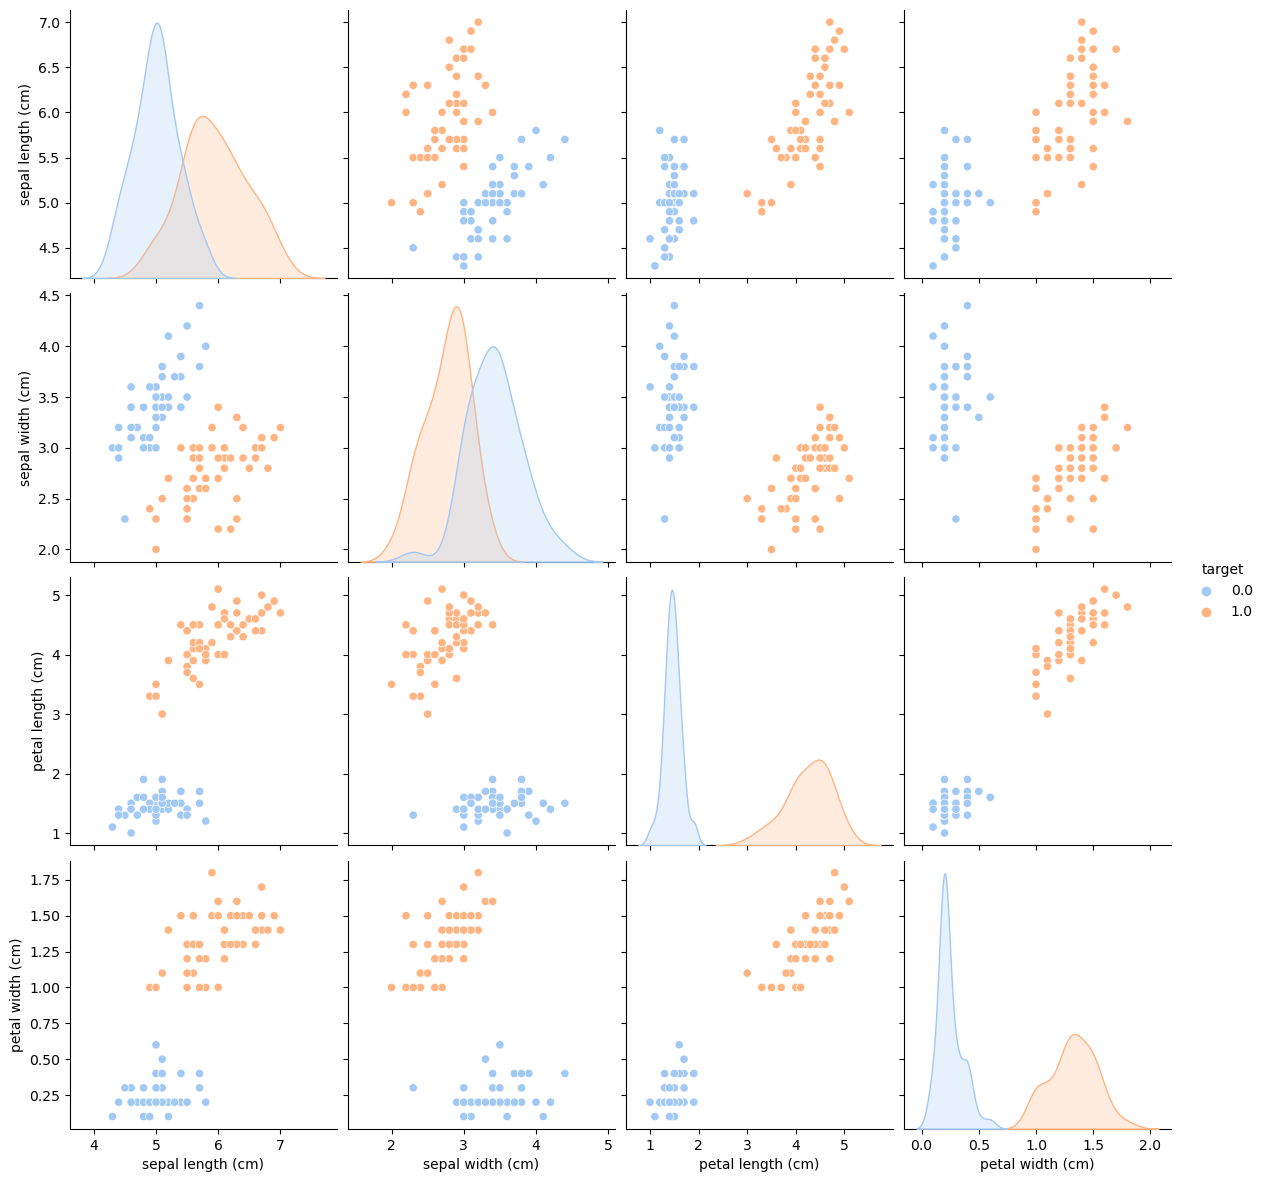

In [3]:
sns.pairplot(df, hue='target', palette='pastel', height=3)

As we can clearly see that, the classification of those 2 classes of flower can be conducted on the features of petal length or petal width and there is no any strong correlation between any attributes in the data.

## 3. Split traning and test data

To perform the cross validation, we must split the data into training data and test data in order to ensure the low bias and avoid overfitting of our model with new unseen data. Suppose we want to divide the data so that the train data is accounted for 75% the size while other 25% of the data is used for test.

In [4]:
 
features = iris.feature_names
X = df.loc[:,features]
y = df.loc[:,'target']
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0, train_size = .75)
print(X_train.shape)
print(X_test.shape)

(75, 4)
(25, 4)


## 4. Standardization 

In this part, we will standardize the data as a pre-processing step before applying any machine learning model on the dataset, because the difference in the value scale of the attribute can have effect on our model. Using the Scikit learn library, we apply the fit_transform function on the train data and the transform function on the test data, in order to make the test data as an unseen data for the model.

In [5]:
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("Head of the train data")
print(X_train[:5])
print("Head of the test data")
print(X_test[:5])

Head of the train data
[[-0.32489916  1.21825122 -0.96234562 -1.04470067]
 [-1.46204623  0.59386278 -1.03167888 -0.86980658]
 [ 0.32489916 -0.65491409  0.84031909  0.87913427]
 [ 0.48734874 -0.86304357  0.70165257  0.70424018]
 [ 2.11184455 -0.65491409  1.32565189  1.05402835]]
Head of the test data
[[-0.8122479   0.59386278 -0.89301236 -0.6949125 ]
 [ 1.94939497 -0.03052566  1.25631863  1.22892244]
 [-1.29959665  0.17760382 -1.10101214 -1.04470067]
 [ 0.32489916 -0.65491409  1.11765212  0.87913427]
 [ 1.78694539 -0.23865514  1.04831886  1.05402835]]


### 5. Apply the machine learning models and evaluation

After we have splitted the data into train and test parts, we are going to apply some machine learning classification models on the train data and use the test data to evaluate the performance of those models.

In this exercise, I decide to use 3 classification algorithms leant in the class:
- KNN
- Decision Tree
- Logistic regression

Firstly, we will use the KNN model with k = 3, which utilize the Euclidean distance between the data point and the mean of trained classes to decide the class which the new data belongs to. Secondly, we will fit our data into the Decision Tree with max depth of 5. Finally we will applythe Logistic Regression model and all compare those models' performances.

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, confusion_matrix

# KNN algorithm
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# Decision tree algorithm
decision_tree = DecisionTreeClassifier(min_samples_split=3, max_depth=5)
decision_tree.fit(X_train, y_train)
dt_pred = decision_tree.predict(X_test)

# Logistic regression 
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_pred = log_reg.predict(X_test)

Now, we are going to evaluate the models which some scores
- Accuracy score is equal to the ratio of total correct instances to the total instances.
- Precision score measure the accuracy of the model's positive prediction, and equal to the ratio of true positive prediction to the number of all positive predictions of the model.
- Recall score measures the effectiveness of the model in identifying all the relevant instances in the dataset and equal to ratio of true positive to the sum of true positive and false negative.
- F1-score is the harmonic mean of precision and recall score, used to measure the overall performance of the model.

In [7]:
print("The accuracy of the KNN model is {}".format(accuracy_score(y_test, knn_pred)))
print("The precision score of the KNN model is {}".format(precision_score(y_test, knn_pred)))
print("The recall score of the KNN model is {}".format(recall_score(y_test, knn_pred)))
print("The F1 score of the KNN model is {}\n".format(f1_score(y_test, knn_pred)))

print("The accuracy of the Decision Tree model is {}".format(accuracy_score(y_test, dt_pred)))
print("The precision score of the Decision Tree model is {}".format(precision_score(y_test, dt_pred)))
print("The recall score of the Decision Tree model is {}".format(recall_score(y_test, dt_pred)))
print("The F1 score of the Decision Tree is {}\n".format(f1_score(y_test, dt_pred)))

print("The accuracy of the Logistic regression model is {}".format(accuracy_score(y_test, log_pred)))
print("The precision score of the Logistic regression model is {}".format(precision_score(y_test, log_pred)))
print("The recall score of the Logistic regression model is {}".format(recall_score(y_test, log_pred)))
print("The F1 score of the Logistic regression is {}".format(f1_score(y_test, log_pred)))

The accuracy of the KNN model is 1.0
The precision score of the KNN model is 1.0
The recall score of the KNN model is 1.0
The F1 score of the KNN model is 1.0

The accuracy of the Decision Tree model is 1.0
The precision score of the Decision Tree model is 1.0
The recall score of the Decision Tree model is 1.0
The F1 score of the Decision Tree is 1.0

The accuracy of the Logistic regression model is 1.0
The precision score of the Logistic regression model is 1.0
The recall score of the Logistic regression model is 1.0
The F1 score of the Logistic regression is 1.0


Let's view the confusion matrix of these binary classification models

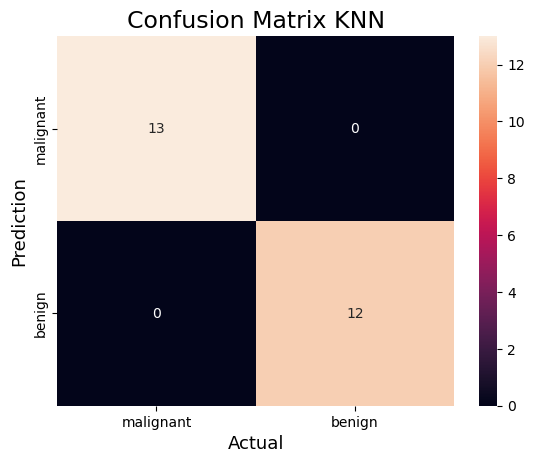

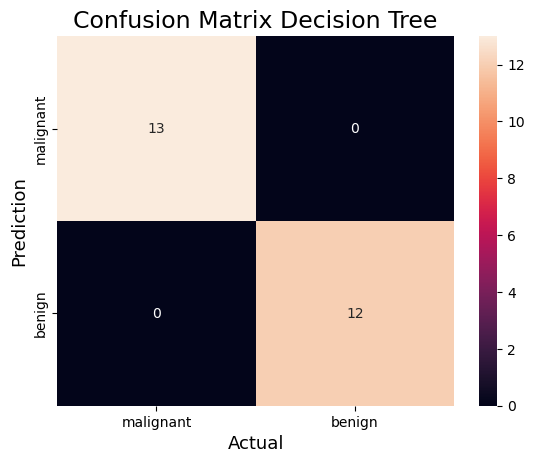

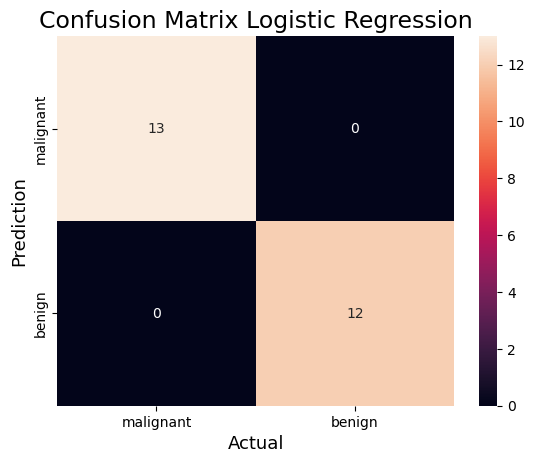

In [8]:
cm_knn = confusion_matrix(y_test, knn_pred)
cm_dt = confusion_matrix(y_test, dt_pred)
cm_log = confusion_matrix(y_test, log_pred)

sns.heatmap(cm_knn, annot=True,fmt='g', xticklabels=['malignant', 'benign'],yticklabels=['malignant', 'benign'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix KNN',fontsize=17)
plt.show()

sns.heatmap(cm_dt, annot=True,fmt='g', xticklabels=['malignant', 'benign'],yticklabels=['malignant', 'benign'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix Decision Tree',fontsize=17)
plt.show()

sns.heatmap(cm_log, annot=True,fmt='g', xticklabels=['malignant', 'benign'],yticklabels=['malignant', 'benign'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix Logistic Regression',fontsize=17)
plt.show()

We can see that all the models have very impressive accuracy of 100% with the Iris dataset. This is good for our data, but they may be prone to overfitting with the new data. To see how this model makes decisions at different levels of uncertainty, we will use the ROC curve and the AUC score.

The AUC score of KNN model is 1.0
The AUC score of Decision Tree model is 1.0
The AUC score of Logistic Regression model is 1.0


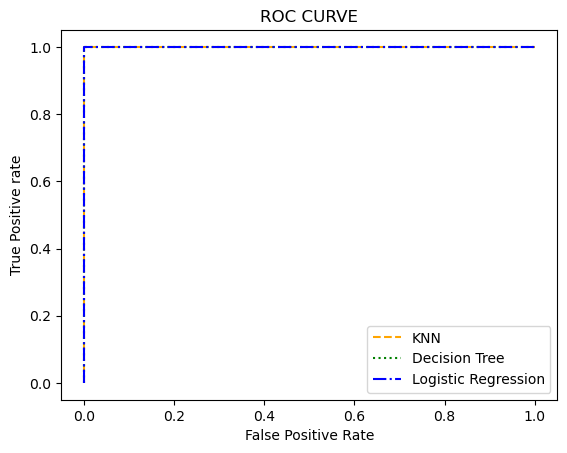

In [9]:
fpr1, tpr1, thresh1 = roc_curve(y_test, knn_pred, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, dt_pred, pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, log_pred, pos_label=1)

# AUC score
auc_score1 = roc_auc_score(y_test, knn_pred)
auc_score2 = roc_auc_score(y_test, dt_pred)
auc_score3 = roc_auc_score(y_test, log_pred)
print("The AUC score of KNN model is {}".format(auc_score1))
print("The AUC score of Decision Tree model is {}".format(auc_score2))
print("The AUC score of Logistic Regression model is {}".format(auc_score3))

# ROC curve
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='KNN')
plt.plot(fpr2, tpr2, linestyle='dotted',color='green', label='Decision Tree')
plt.plot(fpr2, tpr2, linestyle='dashdot',color='blue', label='Logistic Regression')
plt.title("ROC CURVE")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

All of the 3 classification models have the same confusion matrix, as well as the ROC curve and AUC score, which mean those 2 classes of flower Setosa and Versicolor have much different features, and can be classified with a very high accuracy by machine learning models. 

Finally, we will find the decission boundary of these 3 models. As we have 4 attributes in the Iris data, we will sequnetially fit 2 first attributes and then 2 last attribute to those classofoer for plotting.

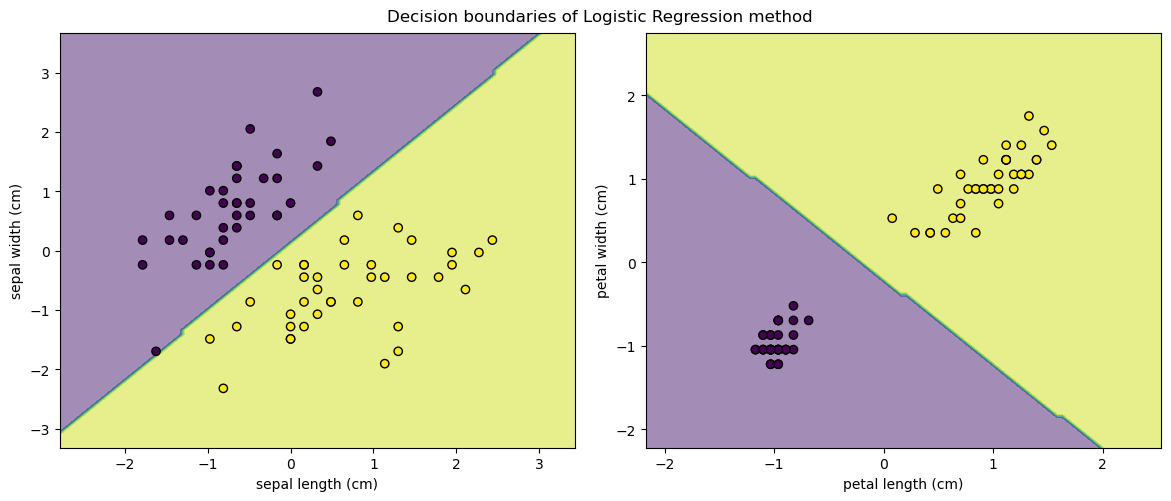

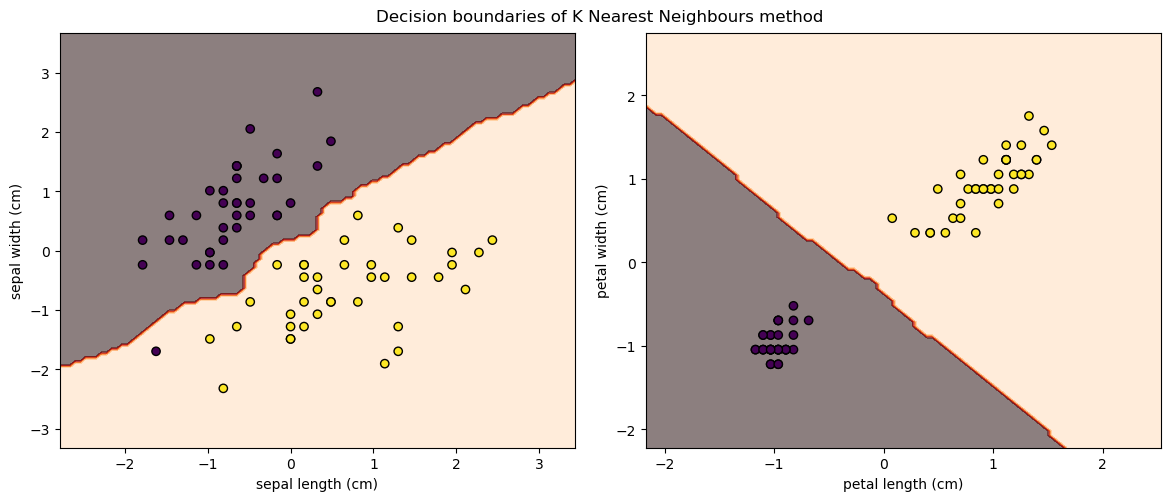

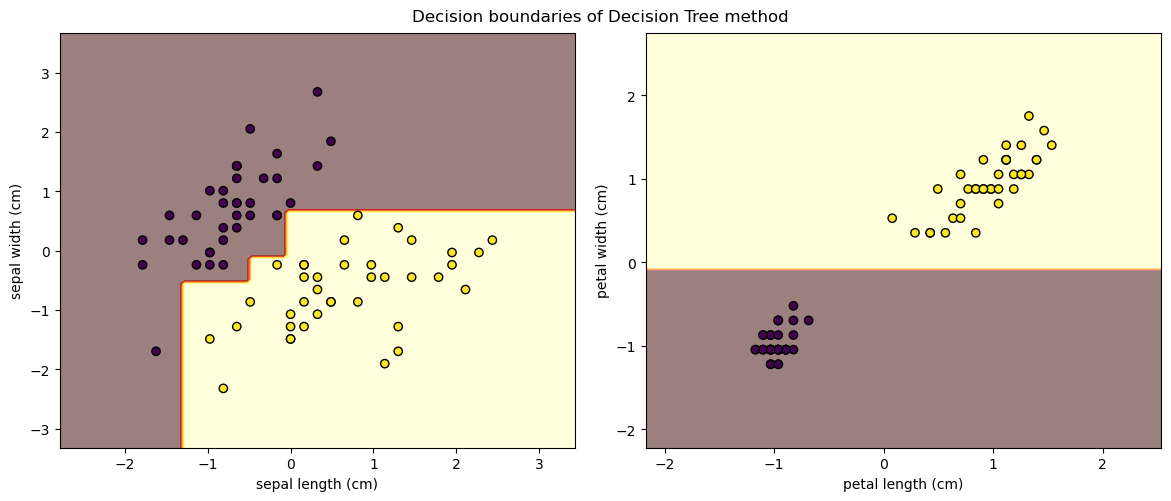

In [48]:
from sklearn.inspection import DecisionBoundaryDisplay
X1 = X_train[:, :2]
X2 = X_train[:, 2:4]

# Logistic regression
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))
fig.tight_layout(pad=2)
log_classifier_1 = LogisticRegression().fit(X1, y_train)
log_disp_1 = DecisionBoundaryDisplay.from_estimator(
    log_classifier_1, X1, response_method="predict",
    xlabel=iris.feature_names[0], ylabel=iris.feature_names[1],ax=ax1,
    alpha=0.5,
)
log_disp_1.ax_.scatter(X1[:, 0], X1[:, 1], c=y_train, edgecolor="k")
log_classifier_2 = LogisticRegression().fit(X2, y_train)
log_disp_2 = DecisionBoundaryDisplay.from_estimator(
    log_classifier_2, X2, response_method="predict",
    xlabel=iris.feature_names[2], ylabel=iris.feature_names[3],ax=ax2,
    alpha=0.5,
)
log_disp_2.ax_.scatter(X2[:, 0], X2[:, 1], c=y_train, edgecolor="k")
fig.suptitle("Decision boundaries of Logistic Regression method")
plt.show()

# KNN
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))
fig.tight_layout(pad=2)
knn_classifier_1 = KNeighborsClassifier(n_neighbors=3).fit(X1, y_train)
knn_disp_1 = DecisionBoundaryDisplay.from_estimator(
    knn_classifier_1, X1, response_method="predict",
    xlabel=iris.feature_names[0], ylabel=iris.feature_names[1], ax=ax1,
    alpha=0.5, cmap='gist_heat',
)
knn_disp_1.ax_.scatter(X1[:, 0], X1[:, 1], c=y_train, edgecolor="k")
knn_classifier_2 = KNeighborsClassifier(n_neighbors=3).fit(X2, y_train)
knn_disp_2 = DecisionBoundaryDisplay.from_estimator(
    knn_classifier_2, X2, response_method="predict",
    xlabel=iris.feature_names[2], ylabel=iris.feature_names[3], ax=ax2,
    alpha=0.5, cmap='gist_heat',
)
knn_disp_2.ax_.scatter(X2[:, 0], X2[:, 1], c=y_train, edgecolor="k")
plt.suptitle("Decision boundaries of K Nearest Neighbours method")
plt.show()

# Decision tree
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))
fig.tight_layout(pad=2)
dt_classifier_1 = DecisionTreeClassifier(min_samples_split=3, max_depth=5).fit(X1, y_train)
dt_disp_1 = DecisionBoundaryDisplay.from_estimator(
    dt_classifier_1, X1, response_method="predict",
    xlabel=iris.feature_names[0], ylabel=iris.feature_names[1],ax=ax1,
    alpha=0.5, cmap='hot',
)
dt_disp_1.ax_.scatter(X1[:, 0], X1[:, 1], c=y_train, edgecolor="k")
dt_classifier_2 = DecisionTreeClassifier(min_samples_split=3, max_depth=5).fit(X2, y_train)
dt_disp_2 = DecisionBoundaryDisplay.from_estimator(
    dt_classifier_2, X2, response_method="predict",
    xlabel=iris.feature_names[2], ylabel=iris.feature_names[3],ax=ax2,
    alpha=0.5, cmap='hot',
)
dt_disp_2.ax_.scatter(X2[:, 0], X2[:, 1], c=y_train, edgecolor="k")
plt.suptitle("Decision boundaries of Decision Tree method")
plt.show()

### 6. Conclusion

From above verification, all 3 classificaiton algorithms above has an impressive 100% accuracy for binary classification using all the 4 attributes, which can be caused by the distinct values of petal width and petal length between the Setosa and Versicolor flower. In the boundary decision plot, only the Decision Tree method can classify 2 classes of flower using attributes: sepal width and sepal length completely.However, this high accuracy can also lead to overfitting when applying the model with new data and further investigation should be conducted using some validation approaches such as the k-fold cross validation.